                                                                    ESTHER KANYI

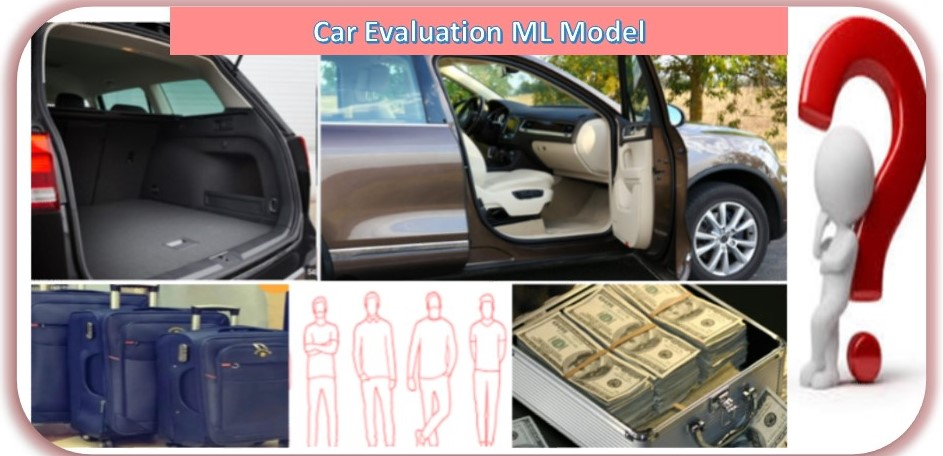

# **Introduction**
Car Evaluation Database was derived from a simple hierarchical
decision model originally developed for the demonstration of DEX
(M. Bohanec, V. Rajkovic: Expert system for decision
making. Sistemica 1(1), pp. 145-157, 1990.).

The aim of this model is to evaluate car's acceptability based on the following features:

  1. PRICE
      * "buying": The buying price
      * "maint": The price of the maintenance

  2. COMFORT
      * "doors": The number of doors
      * "persons":  The capacity in terms of number of persons to carry
      * "lug_boot": The size category of luggage boot
      * "safety": The estimated safety level of the car

## **Importing Libraries**

In [1]:
import pandas as pd
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline





In [3]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading the dataset**

In [50]:
df=pd.read_csv("/content/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


## Adding colomns headers

“buying” : buying price

“maint” : price of the maintenance

“doors” : number of doors

“persons” : capacity in terms of persons to carry

“lug_boot” : the size of luggage boot

“safety” : estimated safety of the car

“class” : evaulation level (unacceptable, acceptable, good,
          very good)


In [51]:
column_names=["buying","maint","doors", "persons", "lug_boot", "safety", "class"]
df.columns = column_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
#checking the shape of the dataset
df.shape

(1727, 7)

In [7]:
#exploring dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Data Transformation

In [52]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [53]:
#replacing 5more with 5
df["doors"]=df["doors"].replace("5more", 5)
df["doors"].unique()

array(['2', '3', '4', 5], dtype=object)

In [54]:
#changing dtype to integer
df["doors"]=df["doors"].astype(int)


In [55]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [56]:
#replacing "more" with "5"
df["persons"]=df["persons"].replace("more", 5)
df["persons"].unique()

array(['2', '4', 5], dtype=object)

In [13]:
#changing dtype to integer
df["persons"]=df["persons"].astype(int)


In [14]:
# Checking for null vales
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Exploratory Data Analysis

### How is the the acceptance level distribution?

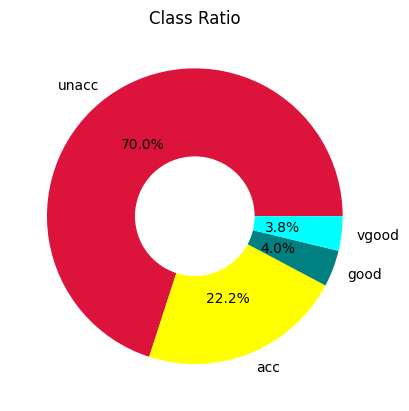

In [15]:
Class=df['class'].value_counts()
#create a pie chart
plt.pie(Class.values, labels=Class.index, colors=["crimson", "yellow", "teal", "aqua"], autopct='%1.1f%%')
plt.title("Class Ratio")
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The anacceptable class has a high distribution

## Class acceptance based on the number of doors

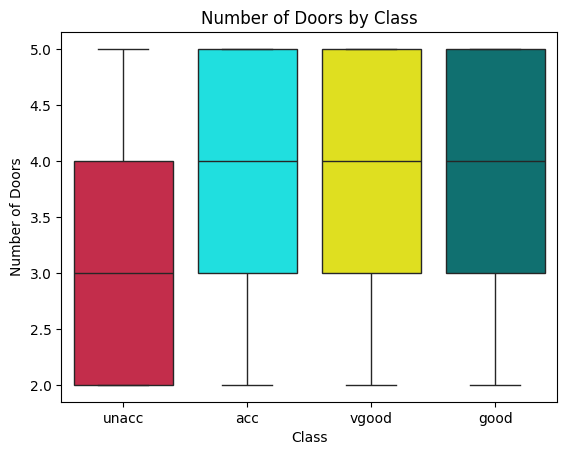

In [ ]:
category_column="class"
numerical_column="doors"

sns.boxplot(x=category_column, y=numerical_column, hue="class", legend=False, data=df, palette=["crimson", "aqua", "yellow", "teal"])
plt.title("Number of Doors by Class")
plt.xlabel("Class")
plt.ylabel("Number of Doors")


plt.show()

* The higher the number of doors the higher the level of acceptance

## The acceptance class based on the number of persons

Text(0.5, 1.0, 'Class by Number of persons')

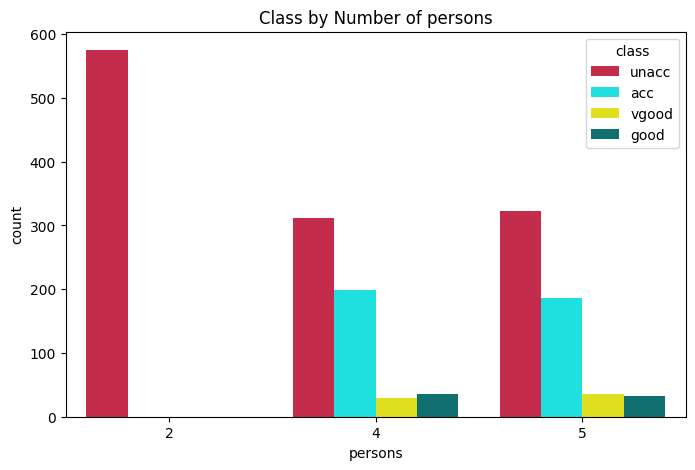

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='persons',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )
plt.title("Class by Number of persons")

* A car with a capacity less than two persons is considered unacceptable
* The higher the number of persons, the higher the acceptance class.

## What is the number of persons based on the maintenance price

Text(0, 0.5, 'Number of persons')

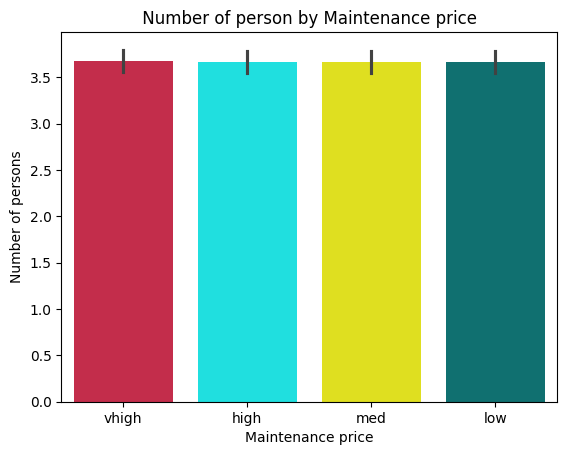

In [ ]:
sns.barplot(x = "maint",  y="persons",  palette=["crimson", "aqua", "yellow", "teal"], data = df)
plt.title(" Number of person by Maintenance price ")
plt.xlabel("Maintenance price")
plt.ylabel("Number of persons")

* The number of persons is not dependent on the maintenance cost

## Class acceptance level in relation to the safety measure

Text(0.5, 1.0, 'Class by Safety')

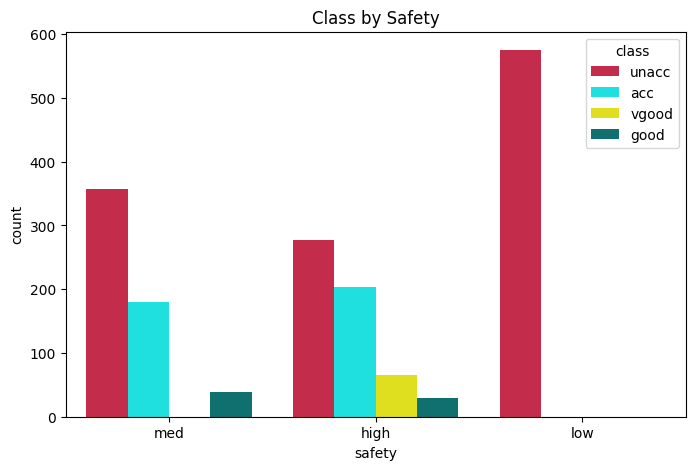

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='safety',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )
plt.title("Class by Safety")

* From the visualization, it is clear that low safety is completely cosindered unacceptable car class.
* The very goog car class is only found in the category high safety.

## How is the acceptance class level affected by the maintenance price?

Text(0.5, 1.0, 'Class by Maint Price')

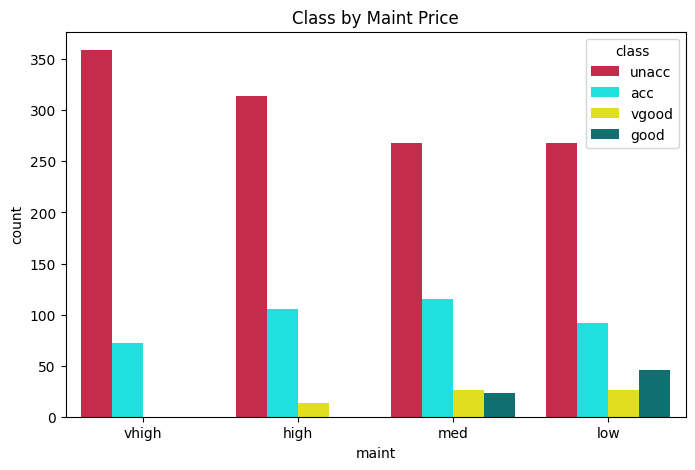

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='maint',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )
plt.title("Class by Maint Price")

* The higher the maintenance price the lower the level of class acceptance

# **Machine Learning**

In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
b=df["buying"].unique()
c=df["maint"].unique()
d=df["lug_boot"].unique()
e=df["safety"].unique()
f=df["class"].unique()
print(b, '\n', c, '\n', d, '\n', e, '\n', f)

['vhigh' 'high' 'med' 'low'] 
 ['vhigh' 'high' 'med' 'low'] 
 ['small' 'med' 'big'] 
 ['med' 'high' 'low'] 
 ['unacc' 'acc' 'vgood' 'good']


## Data encoding

In [57]:
#ordinal encoding
buying_mapping={'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
df['buying_enc']=df["buying"].map(buying_mapping)
df['buying_enc'].unique()


array([4, 3, 2, 1])

In [58]:
maint_mapping={'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
df['maint_enc']=df["maint"].map(maint_mapping)
df['maint_enc'].unique()


array([4, 3, 2, 1])

In [59]:
lugboot_mapping={'small': 1, 'med': 2, 'big': 3}
df['lugboot_enc']=df["lug_boot"].map(lugboot_mapping)
df['lugboot_enc'].unique()


array([1, 2, 3])

In [60]:
safety_mapping={'med': 2, 'high': 3, 'low': 1}
df['safety_enc']=df["safety"].map(safety_mapping)
df['safety_enc'].unique()


array([2, 3, 1])

In [63]:
df['doors_enc']=df["doors"]
df['persons_enc']=df["persons"]
df['class_enc']=df["class"]

In [64]:
#new readings
df_encoded=df.drop(column_names, axis=1)
df_encoded

,buying_enc,maint_enc,lugboot_enc,safety_enc,doors_enc,persons_enc,class_enc
0,4,4,1,2,2,2,unacc
1,4,4,1,3,2,2,unacc
2,4,4,2,1,2,2,unacc
3,4,4,2,2,2,2,unacc
4,4,4,2,3,2,2,unacc
...,...,...,...,...,...,...,...
1722,1,1,2,2,5,5,good
1723,1,1,2,3,5,5,vgood
1724,1,1,3,1,5,5,unacc
1725,1,1,3,2,5,5,good


In [65]:
# define features and target:
x= df_encoded.drop("class_enc", axis=1) # Features
y= df_encoded["class_enc"]  # Target


## Model Cross Validation Using Stratified K-Fold

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [29]:
# Create classifiers
svm_classifier = SVC(kernel='linear', C=1)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Compare classifiers using cross-validation
svm_scores = cross_val_score(svm_classifier, x, y, cv=stratified_kfold, scoring='accuracy')
knn_scores = cross_val_score(knn_classifier, x, y, cv=stratified_kfold, scoring='accuracy')
dt_scores = cross_val_score(dt_classifier, x, y, cv=stratified_kfold, scoring='accuracy')

# Print average accuracy for each classifier
print("SVM Average Accuracy:", svm_scores.mean())
print("KNN Average Accuracy:", knn_scores.mean())
print("Decision Tree Average Accuracy:", dt_scores.mean())

SVM Average Accuracy: 0.8656521739130435
KNN Average Accuracy: 0.9195098631239936
Decision Tree Average Accuracy: 0.9803140096618357


* ### The Decision Tree Model has a higher Cross Validation accuracy score of 98%

# Decision Tree Modelling

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y,shuffle=True,test_size  = 0.20,random_state = 0)

In [31]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [32]:
y_train.shape, y_test.shape

((1381,), (346,))

In [78]:
#fitting the model
dt=DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x, y)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [79]:
prediction = dt.predict(X_test)
prediction[:8]

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'unacc'], dtype=object)

In [80]:
#performance of the trained classifier on the test set
from sklearn.metrics import classification_report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

         acc       0.73      0.84      0.78        67
        good       1.00      0.31      0.47        45
       unacc       0.95      0.97      0.96       234
       vgood       0.00      0.00      0.00         0

    accuracy                           0.86       346
   macro avg       0.67      0.53      0.55       346
weighted avg       0.92      0.86      0.86       346



In [84]:
import graphviz

[Text(0.25, 0.9, 'persons_enc <= 3.0\ngini = 0.457\nsamples = 1727\nvalue = [384, 69, 1209, 65]\nclass = unacc'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 575\nvalue = [0, 0, 575, 0]\nclass = unacc'),
 Text(0.375, 0.7, 'safety_enc <= 1.5\ngini = 0.579\nsamples = 1152\nvalue = [384, 69, 634, 65]\nclass = unacc'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 384\nvalue = [0, 0, 384, 0]\nclass = unacc'),
 Text(0.5, 0.5, 'buying_enc <= 2.5\ngini = 0.629\nsamples = 768\nvalue = [384, 69, 250, 65]\nclass = unacc'),
 Text(0.25, 0.3, 'maint_enc <= 2.5\ngini = 0.642\nsamples = 384\nvalue = [204, 69, 46, 65]\nclass = unacc'),
 Text(0.125, 0.1, 'gini = 0.688\nsamples = 192\nvalue = [63, 69, 8, 52]\nclass = unacc'),
 Text(0.375, 0.1, 'gini = 0.417\nsamples = 192\nvalue = [141, 0, 38, 13]\nclass = unacc'),
 Text(0.75, 0.3, 'maint_enc <= 2.5\ngini = 0.498\nsamples = 384\nvalue = [180, 0, 204, 0]\nclass = unacc'),
 Text(0.625, 0.1, 'gini = 0.375\nsamples = 192\nvalue = [144, 0, 48, 0]\nclass = unacc'),
 T

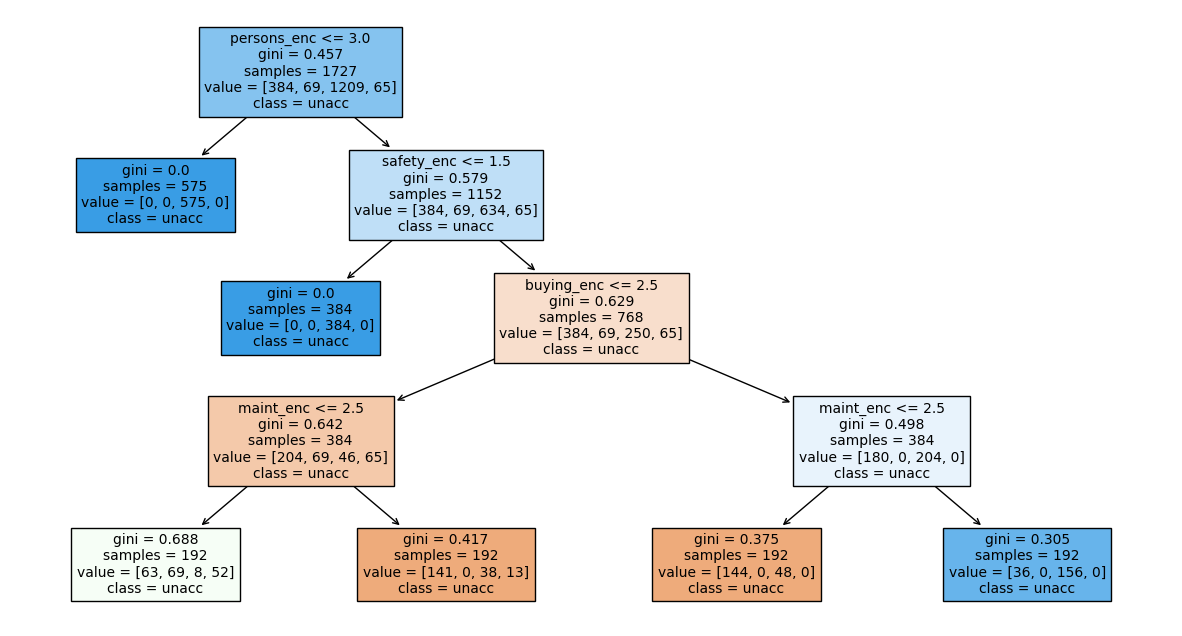

In [87]:
plt.figure(figsize=(15,8))
plot_tree(dt, filled=True,  fontsize=10, feature_names=X_train.columns,
                              class_names=y_train)

# Feature Importances
* Quantifying which features are more important in classifying car's class acceptance

In [90]:
feature_names=X_train.columns
dfFeatures = pd.DataFrame({'Features':feature_names.tolist(),'Importances':dt.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(6)

,Features,Importances
3,safety_enc,0.412091
5,persons_enc,0.274409
1,maint_enc,0.213012
0,buying_enc,0.100487
2,lugboot_enc,0.000000
4,doors_enc,0.000000


* From the table we can conclude that "safety", "number of persons" and "maintainance price" are the most important features in classifying whether the car is acceptable or unacceptable.

                                                          Author: Esther Kanyi